<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week5/JiminShin_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/content/"

train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape,test.shape,submission.shape)

(600, 12) (243, 11) (243, 2)


In [44]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [45]:
test.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [46]:
submission.head(5)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [48]:
train.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


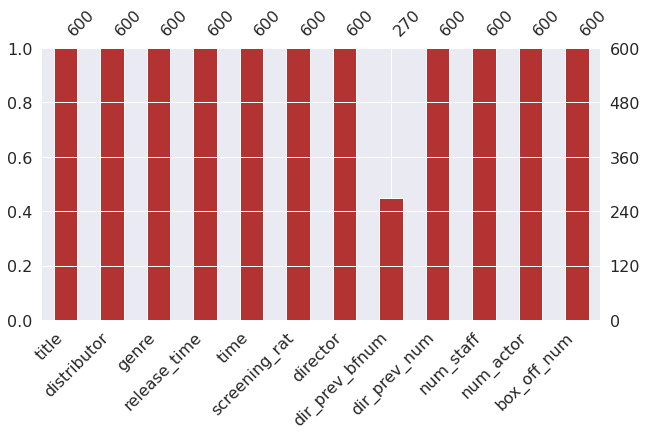

In [49]:
import missingno as msno
msno.bar(train,figsize = (10,5),color=(0.7,0.2,0.2))

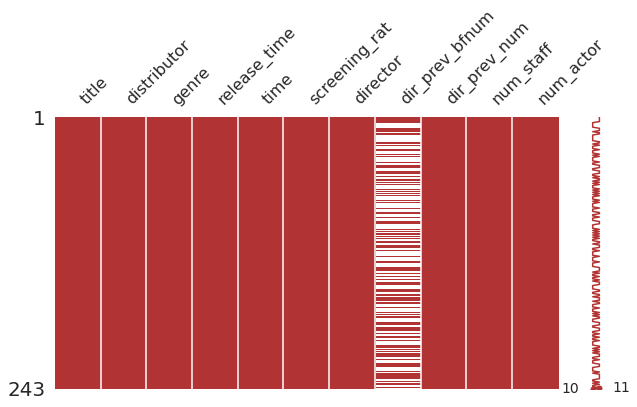

In [50]:
msno.matrix(test,figsize = (10,5),color=(0.7,0.2,0.2))
plt.show()

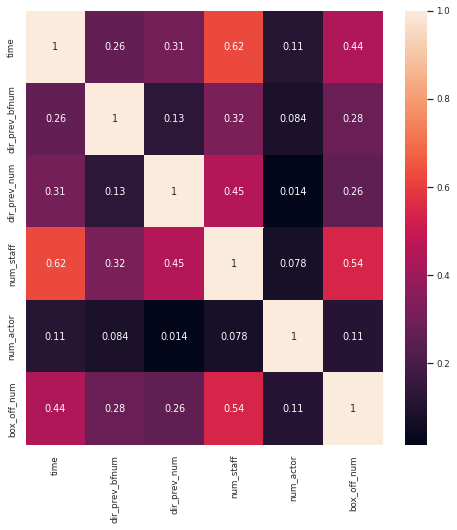

In [51]:
#상관관계를 분석한다. corr함수는 숫자형 데이터로 구성된 열에 대해서만 상관계수를 계산한다.
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True,cbar=True);
plt.show()
#타이타닉 사례에서 객실등급에 따라 객실요금이 달라진다는 결과는 직관적으로 확인 가능
#아래의 히트맵에서는 box_off_num과는 상영시간과 스태프의 수가 상관관계가 높고, 상영시간과 스태프의 수끼리도 상관관계가 높음을 확인할 수 있었다. 
#하지만 이는 직관적으로 생각했을때 상관관계가 있다고 보기 어렵다고 생각한다.

In [55]:
data_num = data.loc[:,['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor','box_off_num']]

data_num['dir_prev_bfnum'] = data_num['dir_prev_bfnum'].fillna(data_num['dir_prev_bfnum'].mean())
data_num['box_off_num'] = data_num['box_off_num'].fillna(data_num['box_off_num'].mean())

from sklearn.model_selection import train_test_split
X = data_num[['time','dir_prev_num','num_staff','num_actor']]
y = data_num[['box_off_num']]
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)


     time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor   box_off_num
0      96    1.005380e+06             0         91          2  2.339800e+04
1     130    1.161602e+06             2        387          3  7.072501e+06
2     123    2.207752e+05             4        343          4  6.959083e+06
3     101    2.389400e+04             2         20          6  2.178660e+05
4     108    1.000000e+00             1        251          2  4.833870e+05
..    ...             ...           ...        ...        ...           ...
238    78    2.590000e+03             1          4          4  7.081818e+05
239    86    1.005380e+06             0         18          2  7.081818e+05
240   107    1.005380e+06             0        224          4  7.081818e+05
241   102    5.069900e+04             1         68          7  7.081818e+05
242    76    1.005380e+06             0         10          4  7.081818e+05

[843 rows x 6 columns]


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print(X_train)
print(y_train)
lr.fit(X_train,y_train)

print('회귀계수:',np.round(lr.coef_,1))
print('상수항:',np.round(lr.intercept_,1))

     time  dir_prev_num  num_staff  num_actor
161   118             1        260          6
117   120             0        290          3
64     98             2        186          4
309   106             1         10          3
548   107             2        157          3
..    ...           ...        ...        ...
233    99             0         40          3
150   125             0         77          4
401    95             1         30          2
462    79             0         14          1
159   125             1        449          3

[674 rows x 4 columns]
       box_off_num
161  497880.000000
117  708181.751667
64   708181.751667
309    1523.000000
548  104736.000000
..             ...
233     339.000000
150  708181.751667
401    6085.000000
462     112.000000
159  708181.751667

[674 rows x 1 columns]
회귀계수: [[ 7388.8 38708.8  3930.9  9654. ]]
상수항: [-714336.8]


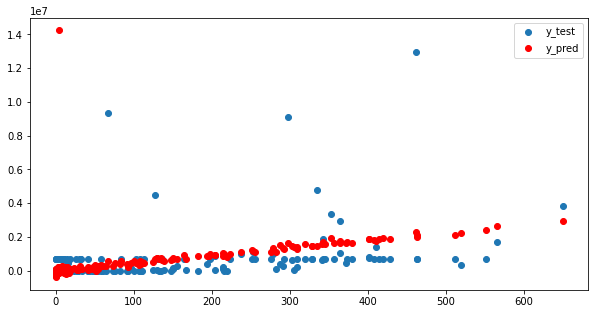

In [65]:
y_test_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['num_staff'],y_test,label='y_test')
plt.scatter(X_test['num_staff'],y_test_pred,c='r',label='y_pred')
plt.legend(loc='best')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train,y_train_pred)
print('Train MSE:%.4f'%train_mse)

test_mse = mean_squared_error(y_test,y_test_pred)
print('Test MSE:%.4f'%test_mse)

Train MSE:1796041569315.3877
Test MSE:3101129867799.1899


In [71]:
y_test_pred = lr.predict(X_test)

#submission['box_off_num'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath,index=False)
submission.head(5)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
